In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import random

N   = 1000
aux = frange(-1,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

# vx  = np.random.choice(aux, N, replace = True)
# vy  = np.random.choice(aux, N, replace = True)
# vz  = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<100)

x = x[mask]
y = y[mask]
z = z[mask]

# vx = vx*400 + 100
# vy = vy*400 + 100
# vz = vz*400 + 100

vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

vx = vx[mask]
vy = vy[mask]
vz = vz[mask]

In [32]:
#W = np.ndarray([len(x),6])
#W[:,0]=x
#W[:,1]=y
#W[:,2]=z
#W[:,3]=vx
#W[:,4]=vy
#W[:,5]=vz
# print W

(-150, 150)

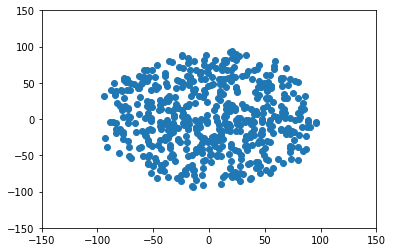

In [4]:
plt.plot(x,y,'o')
plt.xlim(-150,150)
plt.ylim(-150,150)

In [5]:
m = np.ones(len(x))*5e11
m = m/len(m)
print len(m)
# m[0] = 1e20


551


In [6]:
#calculamos la aceleracion

from aceleracion import *

ax, ay, az = aceleracion.a_str(m,x,y,z,len(m))

# d = np.ndarray([np.size(a),3])
# d[:,0] = u_str
# d[:,1] = u_gas
# d[:,2] = u_drk
# np.savetxt('energia_potencial0.dat', d, '%12.6f', '\t')

In [ ]:
#print ax, ay, az

In [37]:
#R = np.ndarray([len(m),6])
#R[:,0]=vx
#R[:,1]=vy
#R[:,2]=vz
#R[:,3]=ax
#R[:,4]=ay
#R[:,5]=az
# print R

In [38]:
#h = 0.1

#for k in range(0,10):
#    for i in range(0,len(m)):
#        W[i,:] = W[i,:] + h * R[i,:]
#        R[:,0] = W[:,3]
#        R[:,1] = W[:,4]
#        R[:,2] = W[:,5]
        
#        R[:,3], R[:,4], R[:,5] = aceleracion.a_str(m,W[:,0],W[:,1],W[:,2],len(m))
        
        #print W[i,:]
        

In [9]:
#%%timeit

h = 0.01
nit=100

xx=x
yy=y
zz=z

vxx=vx
vyy=vy
vzz=vz

axx=ax
ayy=ay
azz=az

E = np.zeros(nit)
G = 4.299e-6

for k in range(0,nit):
    xx = xx + h * vxx
    yy = yy + h * vyy
    zz = zz + h * vzz

    vxx = vxx + h * axx
    vyy = vyy + h * ayy
    vzz = vzz + h * azz
    
    axx,ayy,azz = aceleracion.a_str(m,xx,yy,zz)
    
    e=0.
    for i in range(0,len(m)):
    
        for j in range(0,len(m)):
            if i!=j :
                dx = xx[i]-xx[j]
                dy = yy[i]-yy[j]
                dz = zz[i]-zz[j]
            
                dist = (dx**2 + dy**2 + dz**2)**0.5
                e = e + G*m[i]*m[j]/dist
    E[k] = e


KeyboardInterrupt: 

### print W

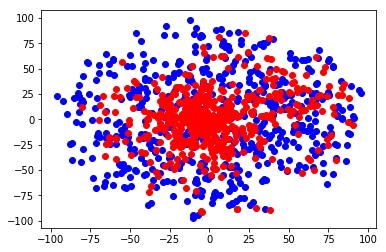

In [49]:
plt.plot(x,y,'o', color='b')
plt.plot(xx,yy,'o', color='r')

In [17]:
from integradores import *
ax,ay,az=integradores.a_str(0.5,m,x,y,z)

In [18]:
#%%timeit
h = 0.001
nit=1000
eps=0.5
#h = 0.0001
#nit = 100000
x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0 =integradores.euler(eps,h,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

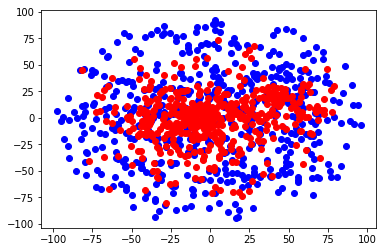

In [19]:
plot(x,y,'o', color='b')
plot(x0,y0,'o', color='r')

In [ ]:
# %%timeit #-r 10 -n 10
# u = 0
# for i in range(1000000000):
#     u = u + 5

In [6]:
# from test import *

In [ ]:
# %%timeit
# uu = test.algo(1000000000000000000)

In [ ]:
#print integradores.__doc__

In [67]:
G = 4.299e-6
#E = np.zeros(10)

#for k in range(0,10):

for i in range(0,len(m)):
    
    for j in range(0,len(m)):
        if i!=j :
            dx = x[i]-x[j]
            dy = y[i]-y[j]
            dz = z[i]-z[j]
            
            dist = (dx**2 + dy**2 + dz**2)**0.5
            e = e + G*m[i]*m[j]/dist
     
 #    E[k] = e

print e

3.8458136626326886e+17
